# 1. Importowanie paczek

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 2. Załadowanie, eskploracja i standaryzacja danych 

In [3]:
raw_data = pd.read_csv("song_data.csv")

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null int64
song_duration_ms    18835 non-null int64
acousticness        18835 non-null float64
danceability        18835 non-null float64
energy              18835 non-null float64
instrumentalness    18835 non-null float64
key                 18835 non-null int64
liveness            18835 non-null float64
loudness            18835 non-null float64
audio_mode          18835 non-null int64
speechiness         18835 non-null float64
tempo               18835 non-null float64
time_signature      18835 non-null int64
audio_valence       18835 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
data = raw_data.copy()
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### 2.1 Sprawdzenie czy nie ma braków w danych

In [6]:
data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

### 2.2 Dane przedstawione sumarycznie

In [7]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


### 2.3 Usunięcie powtarzających się piosenek

In [8]:
songs=data.drop_duplicates(keep="first")
songs

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### 2.4 Rozkład zmiennej docelowej

In [32]:
px.histogram(songs, x='song_popularity')

### 2.5. Porzucenie kolumny z tytułami

In [33]:
songs_data = songs.drop('song_name', axis=1)
songs_data

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### 2.6. Korelacje między poszczególnymi parametrami

In [34]:
corr_matrix = songs_data.corr()
corr_matrix

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,0.000368,-0.042166,0.059769,-0.010613,-0.089630,0.000648,-0.040134,0.059889,0.007902,0.006563,-0.025748,0.025013,-0.045644
song_duration_ms,0.000368,1.000000,-0.116032,-0.088814,0.096466,-0.031165,-0.008912,0.020223,0.028745,-0.028064,-0.078952,0.012559,0.003234,-0.071848
acousticness,-0.042166,-0.116032,1.000000,-0.172820,-0.681701,0.183480,0.000154,-0.086446,-0.570553,0.059052,-0.086663,-0.144405,-0.153122,-0.128944
danceability,0.059769,-0.088814,-0.172820,1.000000,0.055326,-0.125991,0.006749,-0.092736,0.175744,-0.099311,0.199490,-0.129423,0.132904,0.348754
energy,-0.010613,0.096466,-0.681701,0.055326,1.000000,-0.225182,0.013345,0.177947,0.766653,-0.048419,0.074123,0.183194,0.145587,0.316300
instrumentalness,-0.089630,-0.031165,0.183480,-0.125991,-0.225182,1.000000,-0.008603,-0.039782,-0.402895,-0.019981,-0.077260,-0.045872,-0.064735,-0.197955
key,0.000648,-0.008912,0.000154,0.006749,0.013345,-0.008603,1.000000,-0.002771,0.007946,-0.174703,0.028986,-0.003624,-0.007580,0.023335
liveness,-0.040134,0.020223,-0.086446,-0.092736,0.177947,-0.039782,-0.002771,1.000000,0.112964,-0.002889,0.095193,0.028442,0.017031,0.018130
loudness,0.059889,0.028745,-0.570553,0.175744,0.766653,-0.402895,0.007946,0.112964,1.000000,-0.055423,0.080543,0.141644,0.113213,0.211236
audio_mode,0.007902,-0.028064,0.059052,-0.099311,-0.048419,-0.019981,-0.174703,-0.002889,-0.055423,1.000000,-0.111566,0.022780,-0.020303,0.002406


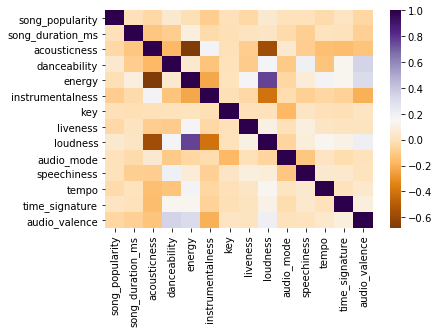

In [35]:
sns.heatmap(corr_matrix, cmap='PuOr')

### 2.7. Standaryzacja danych

In [36]:
minmax = MinMaxScaler(feature_range=(0,1))
minmax_df = minmax.fit_transform(songs_data)
songs_data_scaled = pd.DataFrame(minmax_df, columns=songs_data.columns)
songs_data_scaled

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.727273,0.133179,0.005541,0.502533,0.682342,0.000029,0.727273,0.049226,0.859242,1.0,0.031277,0.689425,0.8,0.481707
1,0.656566,0.107575,0.010340,0.549139,0.853697,0.000000,0.272727,0.099580,0.801948,0.0,0.052979,0.434371,0.8,0.376016
2,0.757576,0.115921,0.008202,0.746707,0.462888,0.448345,0.000000,0.250333,0.766734,1.0,0.084255,0.511233,0.8,0.329268
3,0.737374,0.107575,0.026505,0.456940,0.970940,0.003561,0.000000,0.093426,0.838352,1.0,0.113830,0.505303,0.8,0.201220
4,0.555556,0.111462,0.000957,0.452888,0.766517,0.000000,0.909091,0.104707,0.835204,1.0,0.033298,0.709856,0.8,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14682,0.595960,0.075266,0.896586,0.506586,0.150241,0.000066,1.000000,0.102656,0.561569,1.0,0.037021,0.470328,0.8,0.304878
14683,0.595960,0.101220,0.768072,0.501520,0.160262,0.000001,1.000000,0.096503,0.611850,0.0,0.032021,0.389100,0.8,0.269309
14684,0.222222,0.087993,0.850401,0.728470,0.324602,0.000000,0.000000,0.117014,0.657845,1.0,0.037766,0.538689,0.8,0.290650
14685,0.545455,0.183906,0.948795,0.494428,0.325604,0.015747,0.272727,0.110860,0.662850,1.0,0.034894,0.437702,0.8,0.328252


# 3. Podział na zbiór treningowy i zbiór testowy

In [37]:
train_dataset = songs_data_scaled.sample(frac=0.8, random_state=0)
test_dataset = songs_data_scaled.drop(train_dataset.index)

len(train_dataset)

11750

In [38]:
len(test_dataset)

2937

In [39]:
train_labels = train_dataset.pop('song_popularity')
test_labels = test_dataset.pop('song_popularity')

# 4. Model

In [53]:
model2 = Sequential()
model2.add(Dense(128, kernel_regularizer = 'l2', activation = 'relu', input_shape = [len(train_dataset.keys())]))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(8, activation = 'relu'))
model2.add(Dense(1))

model2.compile(optimizer = 'adam',
             loss = 'mae')
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 6,193
Trainable params: 6,193
Non-trainable params: 0
_________________________________________________________________


In [54]:
history2 = model2.fit(train_dataset, train_labels.values, epochs = 64, validation_split = 0.2, verbose = 1, batch_size = 16)

Train on 9400 samples, validate on 2350 samples
Epoch 1/64
9400/9400 [==============================] - 1s 144us/sample - loss: 0.2165 - val_loss: 0.1665
Epoch 2/64
9400/9400 [==============================] - 1s 118us/sample - loss: 0.1611 - val_loss: 0.1597
Epoch 3/64
9400/9400 [==============================] - 1s 134us/sample - loss: 0.1580 - val_loss: 0.1572
Epoch 4/64
9400/9400 [==============================] - 1s 115us/sample - loss: 0.1569 - val_loss: 0.1568
Epoch 5/64
9400/9400 [==============================] - ETA: 0s - loss: 0.156 - 1s 129us/sample - loss: 0.1562 - val_loss: 0.1562
Epoch 6/64
9400/9400 [==============================] - 1s 119us/sample - loss: 0.1560 - val_loss: 0.1579
Epoch 7/64
9400/9400 [==============================] - 1s 134us/sample - loss: 0.1557 - val_loss: 0.1631
Epoch 8/64
9400/9400 [==============================] - 2s 203us/sample - loss: 0.1555 - val_loss: 0.1572
Epoch 9/64
9400/9400 [==============================] - 2s 168us/sample - loss: 

In [55]:
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

fig = go.Figure()
fig.add_trace(go.Scatter(x=hist2['epoch'], y=hist2['loss'], name='mae', mode='markers+lines'))
fig.add_trace(go.Scatter(x=hist2['epoch'], y=hist2['val_loss'], name='val_mae', mode='markers+lines'))
fig.update_layout(width=1000, height=500, title='MAE vs. VAL_MAE', xaxis_title='Epochs', yaxis_title='Mean Absolute Error', yaxis_type='log')
fig.show()

In [62]:
test_predictions = model2.predict(test_dataset)
test_predictions

array([[0.53410304],
       [0.49673545],
       [0.5274477 ],
       ...,
       [0.4883766 ],
       [0.4950092 ],
       [0.46808657]], dtype=float32)

In [63]:
prediction = pd.DataFrame(test_labels)
prediction["predicted"] = test_predictions
prediction

,song_popularity,predicted
0,0.727273,0.534103
13,0.808081,0.496735
21,0.787879,0.527448
25,0.787879,0.470411
26,0.272727,0.526836
...,...,...
14651,0.626263,0.536068
14652,0.646465,0.427784
14662,0.656566,0.488377
14665,0.616162,0.495009


In [64]:
fig = px.scatter(prediction, 'predicted', 'song_popularity')
fig.add_trace(go.Scatter(x=[0,1], y=[0,1]))
fig.show()